In [1]:
from utils import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from IPython.display import Audio

In [2]:
def helper(node, x):
    """Calculate the branching probabilities from coefficients of Logistic regression and assign to nodes
    Args:
        node (TreeNode): tree
        x: estimated parameters from Logistic regression
    """
    if not node or not node.theta:
        return None
    else:
        node.pleft = 1.0 / (1 + np.exp(node.theta[0][0] + x * node.theta[1][0][0]))
        helper(node.left, x)
        helper(node.right, x)

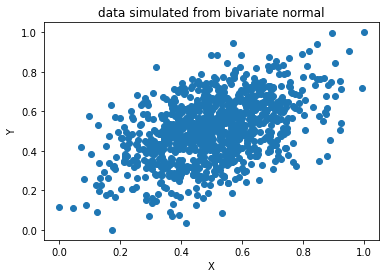

In [3]:
n = 1000
rho = 0.5
X = np.random.normal(0.0, 1, n)
Y = rho * X + np.sqrt(1 - rho**2) * np.random.normal(0.0, 1, n) 
X = (X - min(X))/(max(X) - min(X)) * 0.9999 + 0.00005
Y = (Y - min(Y))/(max(Y) - min(Y)) * 0.9999 + 0.00005
plt.scatter(X, Y);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data simulated from bivariate normal')
Y0 = Y.copy()

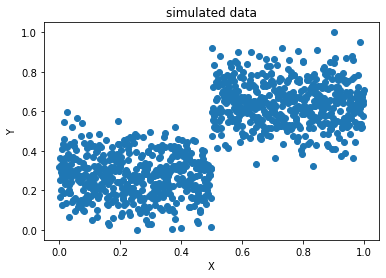

In [4]:
X = np.array(np.linspace(start = 0.001, stop = 0.999, num = n))
Y = (X > 0.5) + np.random.normal(0, 0.3, n) 
X = (X - min(X))/(max(X) - min(X)) * 0.9999 + 0.00005
Y = (Y - min(Y))/(max(Y) - min(Y)) * 0.9999 + 0.00005
plt.scatter(X, Y);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('simulated data')
Y0 = Y.copy()

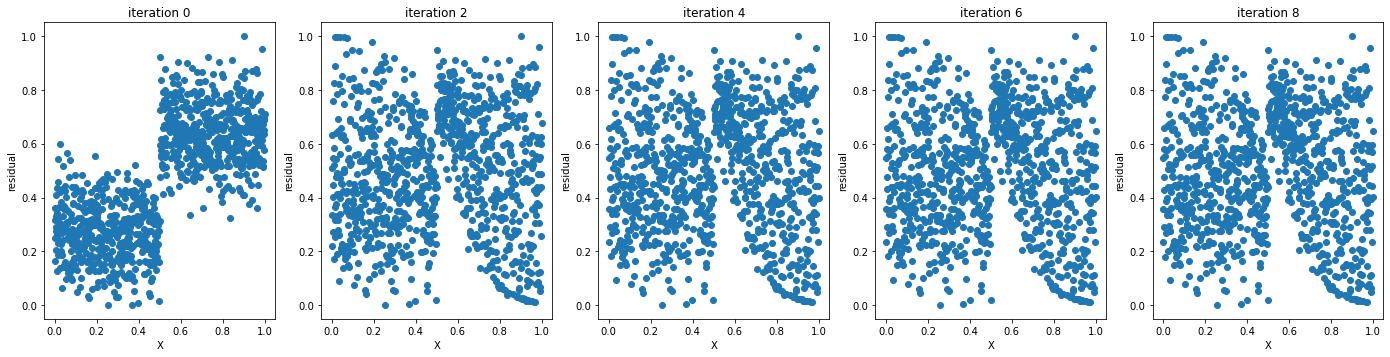

In [5]:
res = Y0.copy()
plt.figure(figsize=(24, 12))
for iter in range(10): 
    if iter%2 == 0: 
        plt.subplot(2, 5, iter//2 + 1);
        plt.scatter(X, np.array(res).reshape(len(res)), label = iter);
        plt.title(f'iteration {iter}');
        plt.xlabel('X');
        plt.ylabel('residual');
    Y = np.array(res.copy())
    for max_depth in [1]:
        tree = TreeNode(split = 0.5, left_bound=0, right_bound=1)
        curr_depth = 1
        # level traversal
        queue = [tree]
        while curr_depth <= max_depth and queue:
            l = len(queue)
            for i in range(l):
                node = queue.pop(0)
                if np.sum(np.logical_and(Y > node.left_bound, Y <= node.right_bound)) == 0:
                    node.pleft = 0.5
                elif np.sum(np.logical_and(Y > node.left_bound, Y <= node.split)) == 0:
                    node.pleft = 0.0
                elif np.sum(np.logical_and(Y > node.split, Y <= node.right_bound)) == 0:
                    node.pleft = 1.0
                else:
                    model = LogisticRegression(solver='saga', random_state=0, penalty="none")
                    local_index = np.logical_and(Y > node.left_bound, Y <= node.right_bound)
                    y_local = Y[local_index]
                    x_local = X[local_index]
                    model.fit(x_local.reshape(-1, 1), (y_local > node.split).astype('int'))
                    node.theta = [model.intercept_, model.coef_]
                    # node.pleft = model.predict_proba(x_local)[:,0]
                node.left = TreeNode(split = (node.left_bound + node.split)/2, left_bound=node.left_bound, right_bound=node.split)
                node.right = TreeNode(split = (node.right_bound + node.split)/2, left_bound=node.split, right_bound=node.right_bound)
                queue.append(node.left)
                queue.append(node.right)
            curr_depth += 1
    res = []
    for i, x in enumerate(X):
        tree_tmp = TreeNode()
        make_copy(tree, tree_tmp)
        helper(tree_tmp, x)
        res.append(tree_tmp.treecdf(Y[i]))


In [6]:
res0 = res.copy()
tree_tmp0 = TreeNode()
make_copy(tree_tmp, tree_tmp0)

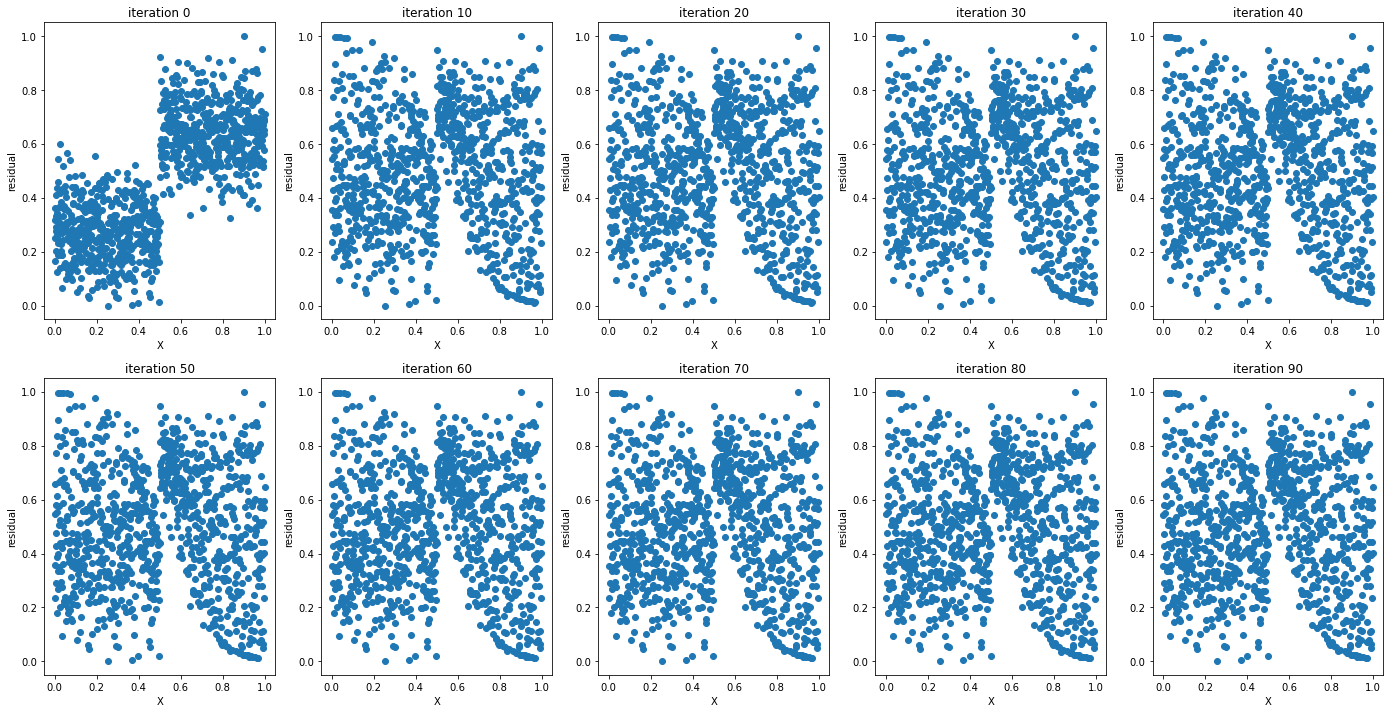

In [7]:
res = Y0.copy()
plt.figure(figsize=(24, 12))
for iter in range(100): 
    if iter%10 == 0: 
        plt.subplot(2, 5, iter//10 + 1);
        plt.scatter(X, np.array(res).reshape(len(res)), label = iter);
        plt.title(f'iteration {iter}');
        plt.xlabel('X');
        plt.ylabel('residual');
    Y = np.array(res.copy())
    for max_depth in [1]:
        tree = TreeNode(split = 0.5, left_bound=0, right_bound=1)
        tree.fit_logistic_middle(residual=Y, X = X, max_depth=max_depth)
    res = []
    for i, x in enumerate(X):
        tree_tmp = TreeNode()
        make_copy(tree, tree_tmp)
        lr2prob(tree_tmp, x)
        res.append(tree_tmp.treecdf(Y[i]))


In [10]:
res1 = res.copy()
tree_tmp1 = TreeNode()
make_copy(tree_tmp, tree_tmp1)

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


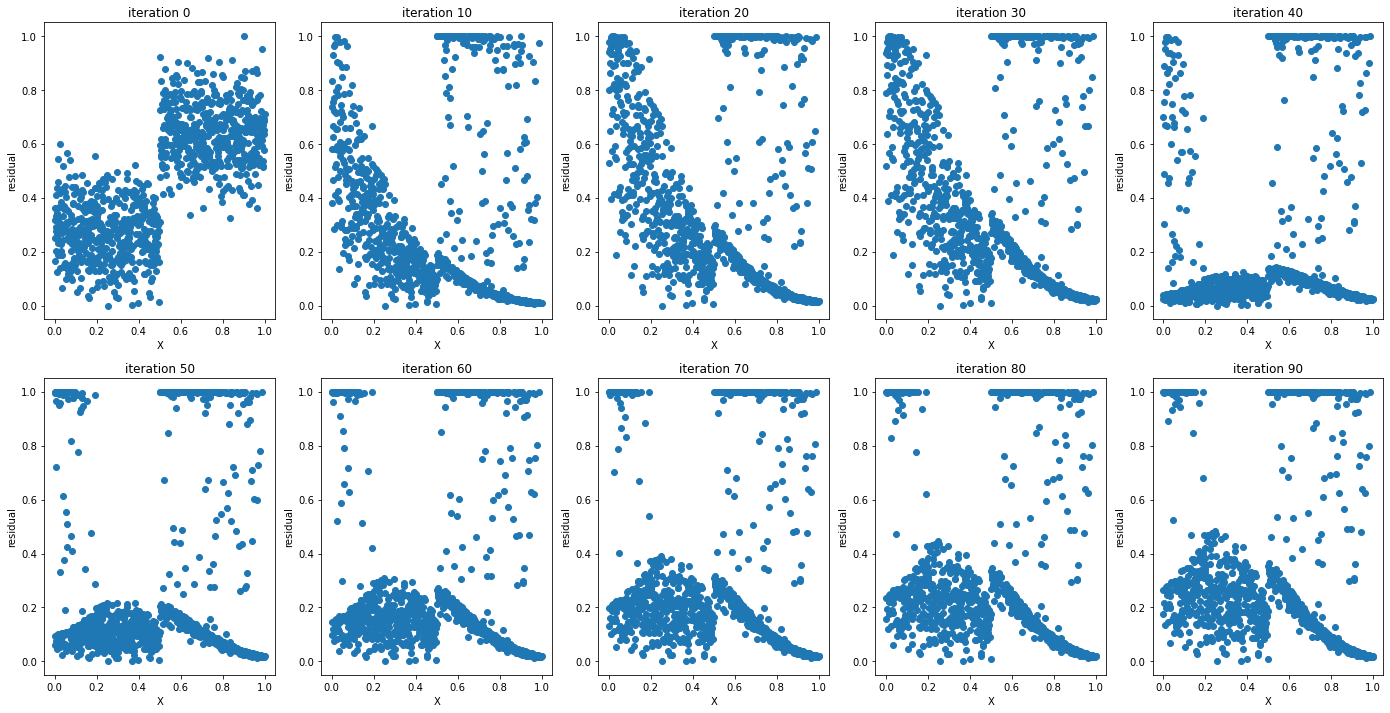

In [17]:
def f(x):
    return 0.0000001 * (x-0.5)**2
res = Y0.copy()
plt.figure(figsize=(24, 12))
for iter in range(100): 
    if iter%10 == 0: 
        plt.subplot(2, 5, iter//10 + 1);
        plt.scatter(X, np.array(res).reshape(len(res)), label = iter);
        plt.title(f'iteration {iter}');
        plt.xlabel('X');
        plt.ylabel('residual');
        print(node.split)
    Y = np.array(res.copy())
    for max_depth in [1]:
        tree = TreeNode(split = 0.5, left_bound=0, right_bound=1)
        tree.fit_logistic_greedy_regularization(residual=Y, X = X, max_depth=max_depth, n_grid=5, regularization = f)
    res = []
    for i, x in enumerate(X):
        tree_tmp = TreeNode()
        make_copy(tree, tree_tmp)
        lr2prob(tree_tmp, x)
        res.append(tree_tmp.treecdf(Y[i]))
    


In [ ]:
res2 = res.copy()
tree_tmp2 = TreeNode()
make_copy(tree_tmp, tree_tmp2)